In [46]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
exercise = pd.read_excel('C:/Users/Lenovo/NORKA/09th december/DATA/E-commerce.xlsx')

In [48]:
exercise.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [49]:
exercise.shape

(2025, 13)

In [50]:
exercise.dtypes # checking the column types

server_time        datetime64[ns]
device_type                object
user_id                   float64
session_id                float64
item_id                   float64
item_price                float64
category                  float64
product_type              float64
impression_time    datetime64[ns]
app_code                  float64
os_version                 object
is_4G                       int64
is_click                    int64
dtype: object

In [51]:
exercise.isnull().sum() # to find the number of null values in each column

server_time        0
device_type        0
user_id            3
session_id         1
item_id            2
item_price         1
category           6
product_type       1
impression_time    0
app_code           1
os_version         9
is_4G              0
is_click           0
dtype: int64

In [52]:
# including all the columns with data types as float
freqgraph = exercise.select_dtypes(include=['float'])

In [53]:
# a subset of the dataframe with column of float types has been stored in freqgraph
freqgraph

,user_id,session_id,item_id,item_price,category,product_type,app_code
0,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,422.0
1,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,467.0
2,71748.0,268465.0,44459.0,825.0,17.0,1619.0,259.0
3,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,244.0
4,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,473.0
...,...,...,...,...,...,...,...
2020,8146.0,284263.0,5754.0,2125.0,13.0,1762.0,207.0
2021,43622.0,284263.0,28621.0,2874.0,10.0,9375.0,207.0
2022,12923.0,284263.0,28621.0,6105.0,17.0,2637.0,3.0
2023,26523.0,418685.0,36253.0,3444.0,7.0,2037.0,207.0


####  to find out whether the float columns  are following a normal distribution or not

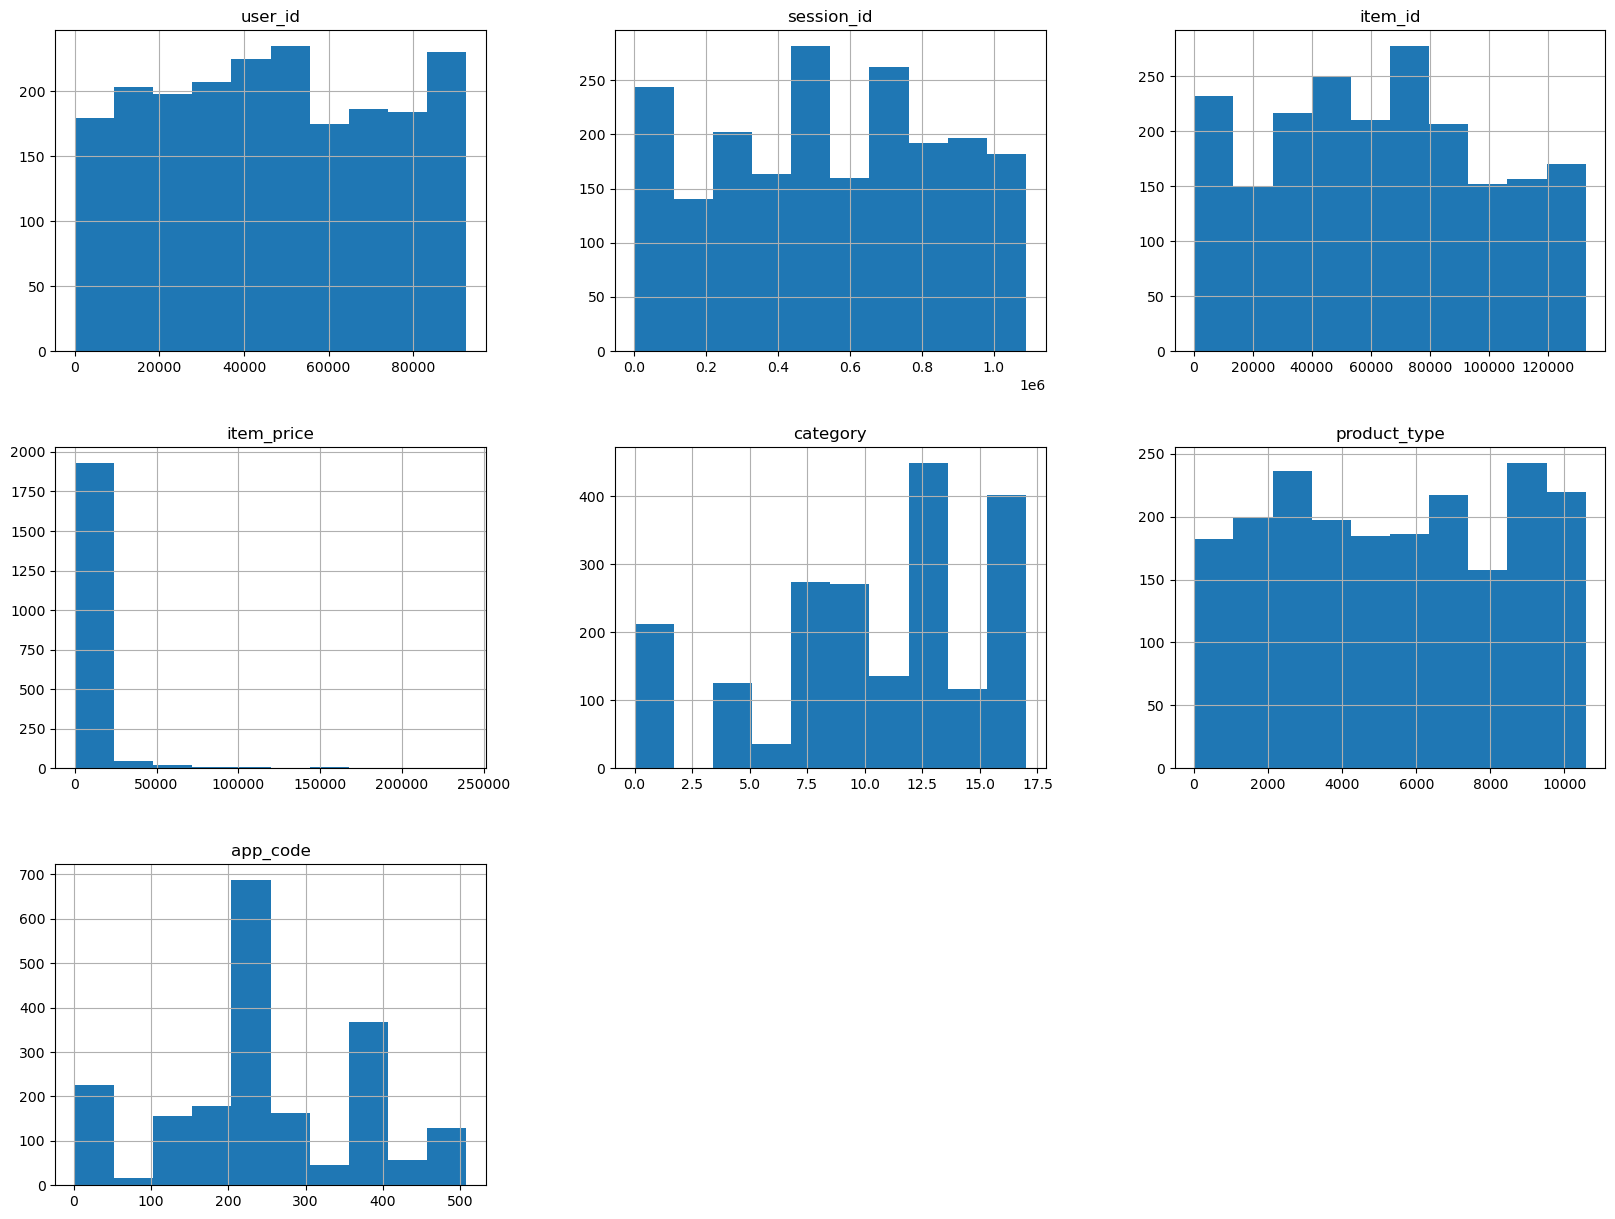

In [54]:
freqgraph.hist(figsize=(20,15))
plt.show()

none of the above columns are following a normal distribution, hence using median to fill the missing values

In [55]:
# to fill NaN values  using for loop in numerical columns
for i in ['user_id', 'session_id',
       'item_id', 'item_price', 'category', 'product_type', 'app_code']:
    exercise[i] = exercise[i].fillna(exercise[i].median())

In [56]:
# using mode() to fill the missing value in categorical column
exercise['os_version'] = exercise['os_version'].fillna(exercise['os_version'].mode()[0])

In [57]:
# checking the  number of null values in each column 
exercise.isnull().sum()

server_time        0
device_type        0
user_id            0
session_id         0
item_id            0
item_price         0
category           0
product_type       0
impression_time    0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64

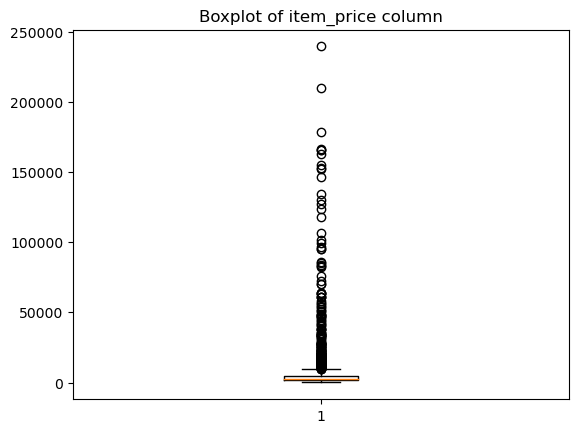

In [58]:
# peforming boxplot to find any outliers 
plt.boxplot(exercise['item_price']);
plt.title('Boxplot of item_price column');

lot of outliers in 'item_price' column

###### FINDING OUTLIERS

In [59]:
# for 'item_price ' to find first, second and third quartile of  'item_price' column
Q1 = np.percentile(exercise['item_price'], 25, interpolation='midpoint')
Q2 = np.percentile(exercise['item_price'], 50, interpolation='midpoint')
Q3 = np.percentile(exercise['item_price'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1465.0
2425.0
4793.0


In [60]:
# to find the (interquartile range) IQR of  'item_price' column
IQR = Q3-Q1
print(IQR)

3328.0


In [61]:
# to find the lower whisker and upper whisker of  'item_price' column
low_limit = Q1-1.5*IQR 
up_limit = Q3+1.5*IQR
print(low_limit)
print(up_limit)

-3527.0
9785.0


In [62]:
# From the  Boxplot,  outliers are present  for 'item_price' column, so to find the outliers and store it in 'outlier' list
outlier = [] 
for x in exercise['item_price']:
    if((x>up_limit) or (x<low_limit)): 
        outlier.append(x) 

In [63]:
# displaying the outliers in 'item_price' column
print (outlier)

[18118.0, 17856.0, 17222.0, 11462.0, 10246.0, 23040.0, 10822.0, 10816.0, 11712.0, 12221.0, 46656.0, 20492.0, 85760.0, 9990.0, 54336.0, 15296.0, 13984.0, 33984.0, 13420.0, 19526.0, 51136.0, 9959.0, 10758.0, 10886.0, 25472.0, 35136.0, 11404.0, 11456.0, 99507.0, 12280.0, 53625.0, 18668.0, 22208.0, 21409.0, 83776.0, 14906.0, 18557.0, 130154.0, 20416.0, 14080.0, 117849.0, 17222.0, 178099.0, 165665.0, 11369.0, 32576.0, 10240.0, 14016.0, 41369.0, 16416.0, 63936.0, 10087.0, 10310.0, 12096.0, 10298.0, 21120.0, 26956.0, 13000.0, 16960.0, 152652.0, 16128.0, 47936.0, 10039.0, 19008.0, 9792.0, 27545.0, 20160.0, 10310.0, 18278.0, 165665.0, 96768.0, 10816.0, 14656.0, 64000.0, 37916.0, 70336.0, 27400.0, 24969.0, 15808.0, 15296.0, 40256.0, 12672.0, 49016.0, 61056.0, 15968.0, 22348.0, 17665.0, 22912.0, 16265.0, 47360.0, 20428.0, 12736.0, 21248.0, 11392.0, 32808.0, 27443.0, 10771.0, 10944.0, 11008.0, 17664.0, 31040.0, 20416.0, 18346.0, 15232.0, 15936.0, 20505.0, 12793.0, 43968.0, 134122.0, 11136.0, 10586

In [64]:
ind1 = exercise['item_price']>up_limit

In [65]:
# locating the index of outliers in 'item_price' column
exercise.loc[ind1].index

Int64Index([   6,    7,   31,   34,   49,   51,   63,   68,   74,   86,
            ...
            1933, 1937, 1948, 1953, 1961, 1978, 1981, 1983, 1998, 2012],
           dtype='int64', length=245)

In [66]:
#removing outliers
exercise.drop(exercise.loc[ind1].index,inplace=True)
exercise.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


#### One hot Encoding

In [67]:
exercise.shape # to find the number of rows and columns

(1780, 13)

In [68]:
exercise.dtypes # to find the types of each column

server_time        datetime64[ns]
device_type                object
user_id                   float64
session_id                float64
item_id                   float64
item_price                float64
category                  float64
product_type              float64
impression_time    datetime64[ns]
app_code                  float64
os_version                 object
is_4G                       int64
is_click                    int64
dtype: object

2 object columns [device_type , os_version]

In [69]:
exercise1 = pd.get_dummies(exercise)

In [70]:
exercise1.shape

(1780, 15)

In [71]:
exercise['device_type'].nunique() 

1

there is  1 unique value in 'device_type' column , so 1  new column created

In [72]:
exercise['os_version'].nunique() 

3

there are 3 unique values in 'os_version' column , so 3  new columns created

1 new column + 3 new columns + 11 other columns = 15 columns in exercise1

In [73]:
exercise1.head()

,server_time,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,is_4G,is_click,device_type_android,os_version_intermediate,os_version_latest,os_version_old
0,2018-10-18 14:27:00,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,0,0,1,0,0,1
1,2018-10-18 14:27:00,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1,0,1,0
2,2018-10-18 14:43:00,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,1,0,1,1,0,0
3,2018-10-18 14:46:00,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,0,1,0,1,0
4,2018-10-18 14:46:00,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,0,0,1,0,1,0


so   3 new columns created  for 'os_version' and 1 new column created for 'device_type'

#### Label Encoding

In [74]:
# importing library
from sklearn.preprocessing import LabelEncoder

In [75]:
# storing LabelEncoder() instance to variable 'le'
le = LabelEncoder() 

In [76]:
exercise['device_type'] = le.fit_transform(exercise['device_type']) # applying fit_transform to 'device_type' column and storing it back to 'device_type' column

In [77]:
exercise['os_version'] = le.fit_transform(exercise['os_version']) # applying fit_transform to 'os_version' column and storing it back to 'os_version' column

In [78]:
exercise.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,0,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,2,0,0
1,2018-10-18 14:27:00,0,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1
2,2018-10-18 14:43:00,0,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,0,1,0
3,2018-10-18 14:46:00,0,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,1,0
4,2018-10-18 14:46:00,0,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,1,0,0


from the above display, now 'device_type' and  'os_version' columns are numerical columns

#### MinMax Scaling 
* scaling is done only for features [variable or column which we are using to predict something]
* target - column which we are predicting
* do not do scaling or normalisation on  target columns or categorical columns or encoded columns
* considering 'item_price' as target column, hence dropping it

In [79]:
A = exercise.drop(['device_type','os_version','server_time','impression_time','is_4G','is_click', 'item_price'],axis=1)

In [80]:
A.head() # only numerical columns present

,user_id,session_id,item_id,category,product_type,app_code
0,87862.0,268465.0,44459.0,11.0,3040.0,422.0
1,63410.0,268465.0,44459.0,12.0,6822.0,467.0
2,71748.0,268465.0,44459.0,17.0,1619.0,259.0
3,69209.0,268465.0,44459.0,13.0,5264.0,244.0
4,62873.0,268465.0,44459.0,17.0,10239.0,473.0


In [81]:
# importing libaray 
from sklearn.preprocessing import MinMaxScaler

In [82]:
minmax = MinMaxScaler(feature_range=(0,1)) # creating an instance for MinMaxScaler()

In [83]:
A1 = minmax.fit_transform(A)

In [84]:
type(A1)

numpy.ndarray

NOTE:-scaling will convert into an array, so describe() will not work

In [85]:
A1

array([[0.94977189, 0.24530103, 0.33373528, 0.64705882, 0.28698533,
        0.83037475],
       [0.68542023, 0.24530103, 0.33373528, 0.70588235, 0.64495977,
        0.91913215],
       [0.77556271, 0.24530103, 0.33373528, 1.        , 0.15248462,
        0.50887574],
       ...,
       [0.13960302, 0.25982759, 0.21437346, 1.        , 0.24884051,
        0.00394477],
       [0.28663322, 0.38343119, 0.27189142, 0.41176471, 0.19204922,
        0.40631164],
       [0.98983762, 0.38343119, 0.18749105, 1.        , 0.20274491,
        0.25246548]])

In [86]:
exercise.columns

Index(['server_time', 'device_type', 'user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'impression_time', 'app_code',
       'os_version', 'is_4G', 'is_click'],
      dtype='object')

In [87]:
A1 = pd.DataFrame(A1, columns=['user_id','session_id','item_id','category','product_type','app_code'])

In [88]:
A1.describe()

,user_id,session_id,item_id,category,product_type,app_code
count,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000
mean,0.505087,0.501222,0.477480,0.603536,0.507318,0.479682
std,0.285281,0.283890,0.276131,0.284741,0.291266,0.245828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.268895,0.250213,0.260089,0.411765,0.258542,0.372781
50%,0.498800,0.498695,0.477835,0.647059,0.510648,0.406312
75%,0.750459,0.733381,0.683094,0.764706,0.767913,0.729783
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
A.describe()

,user_id,session_id,item_id,category,product_type,app_code
count,1780.000000,1.780000e+03,1780.000000,1780.000000,1780.000000,1780.000000
mean,46729.493820,5.467858e+05,63532.398876,10.260112,5367.814888,244.198876
std,26387.962825,3.087378e+05,36639.606662,4.840605,3077.228646,124.634935
min,10.000000,1.694000e+03,176.000000,0.000000,8.000000,1.000000
25%,24882.250000,2.738070e+05,34687.000000,7.000000,2739.500000,190.000000
50%,46148.000000,5.440370e+05,63579.500000,11.000000,5403.000000,207.000000
75%,69426.000000,7.992640e+05,90815.000000,13.000000,8121.000000,371.000000
max,92508.000000,1.089219e+06,132865.000000,17.000000,10573.000000,508.000000


#### Standard Scaling 

In [90]:
A.head()

,user_id,session_id,item_id,category,product_type,app_code
0,87862.0,268465.0,44459.0,11.0,3040.0,422.0
1,63410.0,268465.0,44459.0,12.0,6822.0,467.0
2,71748.0,268465.0,44459.0,17.0,1619.0,259.0
3,69209.0,268465.0,44459.0,13.0,5264.0,244.0
4,62873.0,268465.0,44459.0,17.0,10239.0,473.0


In [91]:
# importing library  
from sklearn.preprocessing import StandardScaler

In [92]:
stdsclr = StandardScaler() # creating an instance for StandardScaler()

In [93]:
A2 = stdsclr.fit_transform(A) # scaling will convert into an array, so describe() will not work

In [94]:
A2 = pd.DataFrame(A2, columns=['user_id','session_id','item_id','category','product_type','app_code'])

In [95]:
A2.head() # also displaying negative values

,user_id,session_id,item_id,category,product_type,app_code
0,1.559198,-0.901733,-0.520714,0.152893,-0.756677,1.426976
1,0.632303,-0.901733,-0.520714,0.359537,0.472696,1.788132
2,0.948369,-0.901733,-0.520714,1.392756,-1.218586,0.118789
3,0.852124,-0.901733,-0.520714,0.566181,-0.033746,-0.001596
4,0.611947,-0.901733,-0.520714,1.392756,1.583423,1.836286
